# Лабороторна робота № 1
### Роботу виконав Мальованний Павло , ІАВ-11, 1 курс(Магістр)

## Опис завдання 
Варінт 4, розподіл Ерланга

$$\begin{array}{|c|c|} \hline \text{Функція щільності} & \frac{\lambda^{k} x^{k - 1} e^{-\lambda x} }{(k - 1)!} \\ \hline \text{Функція розподілу} & P(k, \lambda x) =\frac{\gamma(k,\lambda x)}{(k - 1)!} = 1 - \sum^{k - 1}_{n = 0} \frac{1}{n!} e^{ -\lambda x } (\lambda x)^{n} \\ \hline \text{Параметри} & \begin{array}{l} k \in \{ 1,2,3, \ldots \} \text{ ,форма} \\ \lambda \in (0, \infty) \text{, розмір} \\ \mu = 1/ \lambda   \end{array} \\ \hline  \end{array}$$

В моєму випадку розподіл Ерланга який є гамма розподілом якщо k є цілим числом. В моїй роботі використовуються парметри $k = 5,\mu = 1/\lambda = \frac{1}{0.8}$

# Завдання 1. 
- Обчислити дескриптивні статистики положення та розсіювання. Побудувати коробковудіаграму (boxplot) та гістограму.

In [709]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sc
from scipy.stats import erlang


k = 5 #k
l = 0.8 #lambda
mu = 1/l # mu

n = 200

In [710]:
x = np.random.gamma(k, mu, size=n) # ерланг це гамма 
# розподіл при k цілому так як в нампай нема окремо ерланга
print(x[:10])

[6.15992375 9.01167948 3.04464841 2.28299551 4.09729395 2.66435391
 8.24404068 3.6608443  3.86667434 7.07172419]


In [719]:
def t1(x = x,n = n):
    print("""Min = {},\n Max = {},\n Mean = {},\n Median = {},\n std = {}, 
 range = {},\n Variance = {},\n Upper and lower quantile = {} and {}"""
      .format(np.min(x),np.max(x),np.sum(x)/n,np.median(x),np.std(x),np.max(x) - np.min(x),
             np.var(x),sorted(x)[int(np.floor(n/4))],sorted(x)[int(np.floor(3*n/4))]))
t1() # описові статистики

Min = 0.8442183398914935,
 Max = 17.452602340615268,
 Mean = 5.7991629831676645,
 Median = 5.523477476277883,
 std = 2.673696419911906, 
 range = 16.608384000723774,
 Variance = 7.148652545849744,
 Upper and lower quantile = 3.9259039413838654 and 7.466902163140339


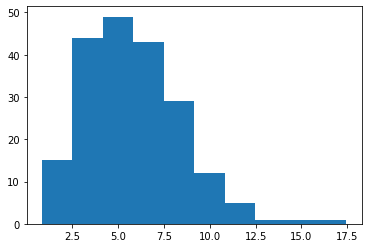

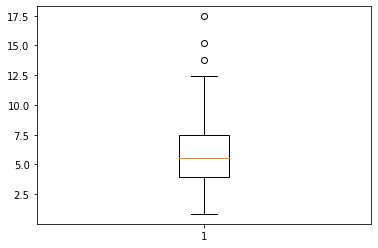

In [712]:
def t11(x = x):
    plt.figure(1)
    plt.hist(x)
    plt.figure(2)
    plt.boxplot(x)
t11(x) # боксплот та гістограма

# Завдання 2. 
- На одному графіку побудувати емпіричну та теоретичну функції розподілу, обчислити значення статистики Колмогорова

Колмогоров:  0.14597800110436332


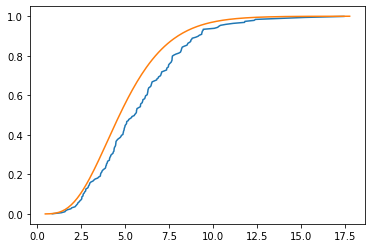

In [713]:
def t2(x = x,n = n,k = k,mu = mu):
    # емпірична
    x0 = np.sort(x)
    y0 = np.linspace(0.001,0.999,n)
    
    # теоретична
    x2 = np.linspace(erlang.ppf(0.0001, k), erlang.ppf(0.9999, k), n)
    y2 = erlang.cdf(x2, k)
    plt.figure(3)
    plt.plot(x0,y0,x2,y2)

    print("Колмогоров: ", sc.kstest(x, 'erlang', args = (k, mu))[0])
t2()

# Завдання 3. 
- На одному графіку побудувати гістограму відносних частот і теоретичну функцію щільності

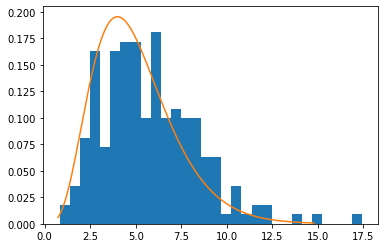

In [714]:
def t3(x = x,k = k):
    xargs=np.linspace(erlang.ppf(0.001,k),erlang.ppf(0.999,k),1000)
    yargs=erlang.pdf(xargs,k)
    plt.figure(4)
    plt.hist(x,bins=30,density=True)
    plt.plot(xargs,yargs)
t3()

# Завдання 4. 
* Побудувати діаграми типу «ймовірність-ймовірність» та «квантиль-квантиль» для порівняння з:
    + 4.1. стандартним нормальним розподілом;
    + 4.2. теоретичним розподілом

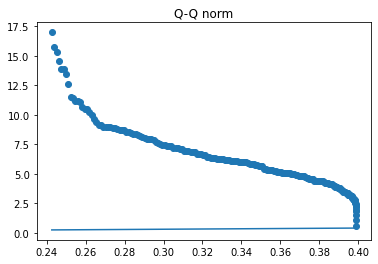

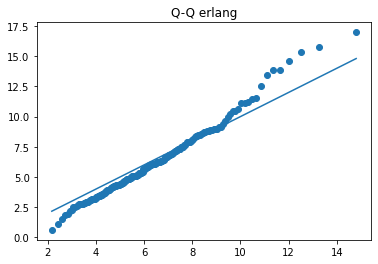

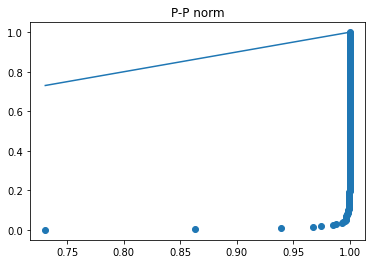

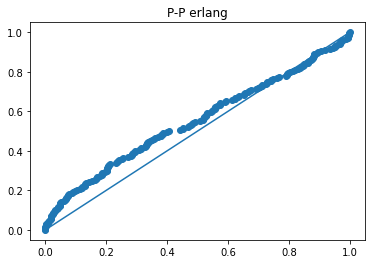

In [718]:
def t4(x0 = x0,k = k,mu = mu,n = n):
    # Q-Q norm distr
    qq = np.linspace(0.5/n, (n - 0.5)/n, n)
    theor1 = sc.norm.pdf(qq)
    xargs1 = x0
    plt.figure(5)
    plt.scatter(theor1, xargs1)
    plt.plot(theor1, theor1)
    plt.title("Q-Q norm")

    # Q-Q erlang distr
    xargs2 = erlang.ppf(qq, k, mu)
    yargs2 = x0
    plt.figure(6)
    plt.scatter(xargs2, yargs2)
    plt.plot(xargs2, xargs2)
    plt.title("Q-Q erlang")

    # P-P norm distr
    xargs3 = sc.norm.cdf(x0) 
    yargs3 = np.linspace(0.000001, 1, n)
    plt.figure(7)
    plt.scatter(xargs3, yargs3)
    plt.plot(xargs3, xargs3)
    plt.title("P-P norm")

    xargs4 = erlang.cdf(x0, k, mu)
    yargs4 = np.linspace(0.00001, 1, n)
    plt.figure(8)
    plt.scatter(xargs4, yargs4)
    plt.plot(xargs4, xargs4)
    plt.title("P-P erlang")
t4()


# Завдання 5. 
- Внести від двох до п’яти «забруднень» і виконати завдання 1-4 на забрудненій вибірці.Порівняти результати, зробити висновки. 

Min = 0.8442183398914935,
 Max = 40.0,
 Mean = 6.033658111495235,
 Median = 5.537818775265576,
 std = 3.70764596644501,
 var = 13.746638612495952, 
 range = 39.15578166010851,
 Variance = 13.746638612495952,
 Upper and lower quantile = 3.9259039413838654 and 7.5077755834939826
Колмогоров:  0.14051002080879682


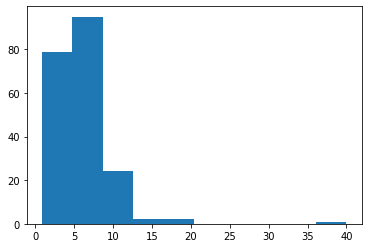

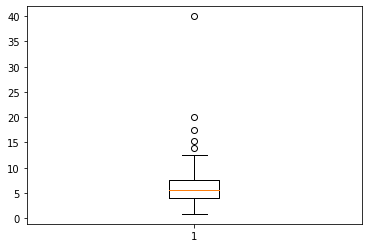

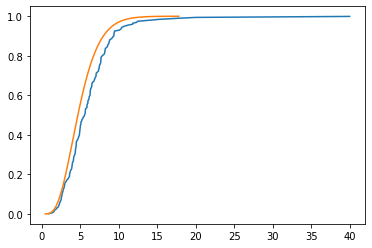

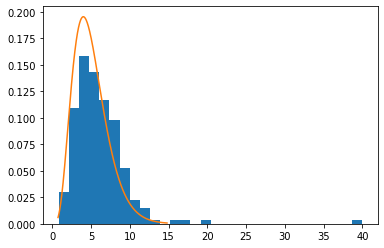

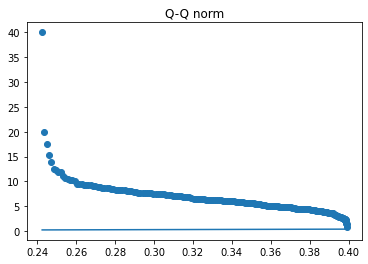

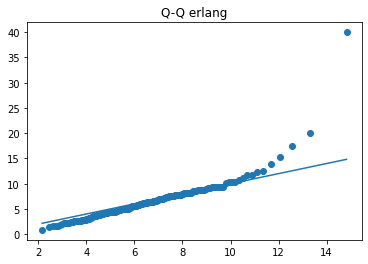

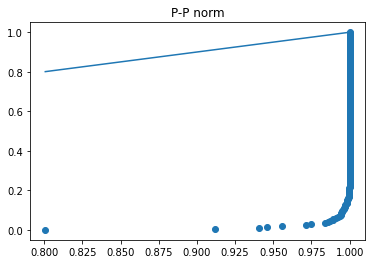

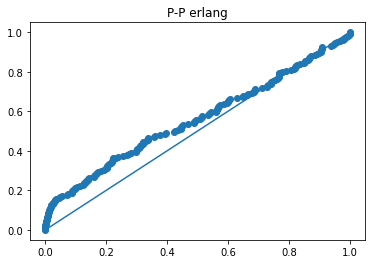

In [716]:
new_x = x.copy()
new_x = np.append(new_x,[5,20,40])
new_n = len(new_x)

t1(x = new_x, n = new_n)
t11(x = new_x)
t2(x = new_x, n = new_n)
t3(x = new_x)
t4(x0 = sorted(new_x),n = new_n)


# Завдання 6. 
- Оформити у вигляді окремої функції алгоритм побудови оцінки невідомого параметру(параметрів) методом моментів за згенерованою вибіркою.

Застосуємо метод моментів та отримає що $\mu_{1} = E \xi = \frac{k}{\lambda}, \quad \hat{\mu}_{1} = \bar{x} = \frac{1}{n} \sum_{i = 0}^{j} x_{i}$

Тепер якщо ми знаємо один із параметрів то $ \left[ \begin{array}{ll}  \lambda \text{ відоме} & \hat{k} = \frac{\lambda}{n} \sum_{i = 0}^{j} x_{i} \\ k \text{ відоме} & \hat{\lambda} = \frac{1}{kn} \sum_{i = 0}^{j} x_{i}         \end{array} \right. $

Якщо ми не знаємо ні одного із параметрів то шукаємо теоретичний і вибірковий моменті 2-го порядку: 

$ \begin{array}{l} \mu_{2} = E \xi^{2} = \frac{k}{\lambda^{2}} \\ \hat{\mu}_{2} = \overline{x^{2}} = \frac{1}{n} \sum_{i = 0}^{j} x_{i}^{2} \\ \frac{k}{\lambda} = \bar{x}, \qquad  \frac{k}{\lambda^{2}} = \overline{x^{2}} \\ \left\{ \begin{array}{l} \hat{k} = \frac{\overline{x}^{2}}{\overline{x^{2}}} \\ \hat{\lambda} = \frac{\overline{x}}{\overline{x^{2}}} \end{array} \right.  \end{array} $

In [717]:
def t6(sample,k = 0,lam = 0):
    mu1 = np.mean(x) # мю_1
    n = len(sample)
    
    if k == 0 and lam == 0: # обидва невідомі
        mu2 = 0
        for i in sample:
            mu2 += i**2
        mu2 /= n
        k = (mu1**2)/mu2
        lam = mu1/mu2
    elif k == 0: # к невідомо
        k = mu1*lam
    elif lam == 0:  # лямбда невідомо
        lam = mu1/k
    return  k, lam
        

Висновки:
- У цій лабороторній роботі я навчився генерувати вибірки різних розподілів(у цій роботі це було для Ерланга), будувати функцію розподілу та щільності та порівнювати їх з теоретичним , також будувати і аналізувати Q-Q та P-P графіки. Також я навчився використовувати нові функції на пайтоні та розширив перелік своїх можливостей.
- Щодо викидів - вони чуттєво вплинули на наші графіки,але я обрала доволі сильні викиди які одразу відобразилися на гістограмі,бокс плоті,розподілі функції, QQ та PP плотах тому можна сказати що на розподіл доволі чутливий до викидів але їх неважко ідентифікувати.